# Simple linear regression

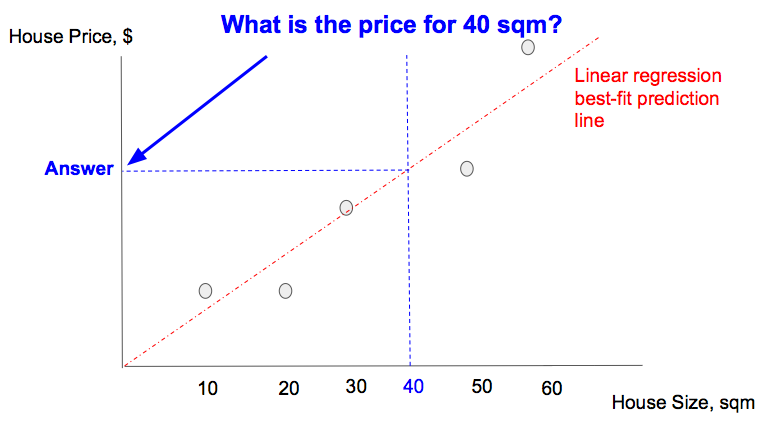

In [1]:
from IPython.display import Image
Image("lr.png")

In [5]:
import numpy as np
import pandas as pd

In [6]:
ds=pd.read_csv("Salary_Data.csv")

In [7]:
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
ds.isnull().mean()

YearsExperience    0.0
Salary             0.0
dtype: float64

### input variable - X and one output variable - Y

In [10]:
x=ds.YearsExperience
y=ds.Salary

### To find linear relationship we use 
## y = b0+b1x

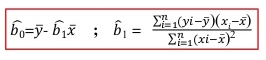

In [7]:
Image("b0.png")

In [11]:
m=len(x)
num=0
den=0
mean_x=x.mean()
mean_y=y.mean()
for i in range(m):
    num+=(y[i]-mean_y) * (x[i]-mean_x)
    den+=(x[i]-mean_x)**2
b1=num/den
b0=mean_y - (b1*mean_x)

In [12]:
print(b0,b1)

25792.20019866869 9449.962321455077


In [10]:
ds[20:24]

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0


In [14]:
25792.20019866869+9449.962321455077*6

82491.97412739915

In [12]:
import matplotlib.pyplot as plt

In [13]:
y_pred=b0+(b1*x)

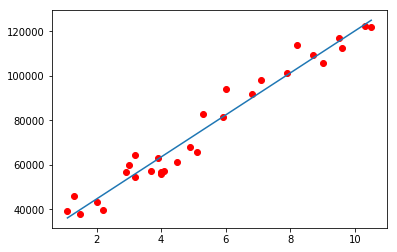

In [14]:
plt.scatter(x,y,color="red")
plt.plot(x,y_pred)

### Using Sklearn 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [19]:
x_arr=ds.iloc[:,0].values
y_arr=ds.iloc[:,1].values

In [20]:
x_arr=x_arr.reshape(-1, 1)

In [21]:
lr.fit(x_arr,y_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lr.coef_

array([9449.96232146])

In [23]:
lr.intercept_

25792.20019866869

In [24]:
print(b0,b1)

25792.20019866869 9449.962321455077


In [25]:
y_pred1=lr.predict(x_arr)

In [26]:
y_pred1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

## Mean Squared Error

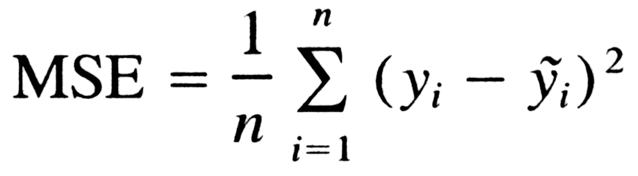

In [25]:
Image("mse.png")

## has to be low 

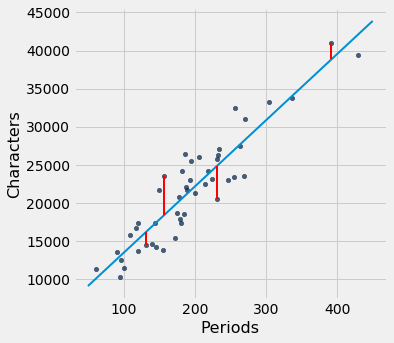

In [26]:
Image("dis.png")

### the distance between line to points are calculated as mse 

In [27]:
mse=0
for i in range(m):
    mse+=(y[i]-y_pred[i])**2
mse=mse/m

In [28]:
mse

31270951.72228097

In [29]:
from sklearn.metrics import mean_squared_error
mse_t = mean_squared_error(y, y_pred)
mse_t

31270951.72228097

## R2 score

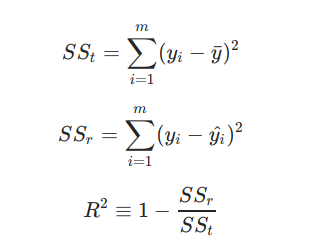

In [30]:
Image("r2.png")

#### higher value is better

In [31]:
sst=0
ssr=0
r2=0
for i in range(m):
    ssr+=(y[i]-y_pred[i])**2
    sst+=(y[i]-mean_y)**2
r2=1-ssr/sst

In [32]:
r2

0.9569566641435086

In [56]:
x=x.values

In [57]:
x=x.reshape(-1, 1)

In [58]:
lr.score(x,y)

0.9569566641435084